In [1]:
import pandas as pd

In [2]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [3]:
df = pd.read_csv("pima-indians-diabetes-1.data",names = colnames)

In [4]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
target = 'class'

In [6]:
df[target].value_counts()

0    500
1    268
Name: class, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

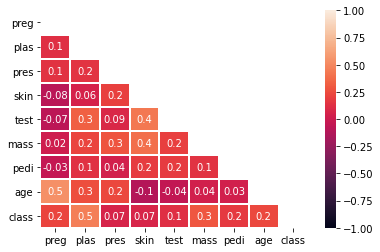

In [8]:
sns.heatmap(data=df.corr(),annot=True,vmin=-1,vmax=1,linewidths=1,fmt='.1g',mask =np.triu(df.corr()))
plt.show()

In [9]:
list(df)

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [10]:
x = df.drop(target,axis=1)
y = df[target]

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
VIF = pd.DataFrame()
VIF['col']= list(x)
VIF['imp']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
round(VIF)

,col,imp
0,preg,3.0
1,plas,17.0
2,pres,15.0
3,skin,4.0
4,test,2.0
5,mass,18.0
6,pedi,3.0
7,age,13.0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=100)

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
model = GaussianNB()

In [18]:
model.fit(x_train,y_train)

GaussianNB()

In [19]:
model.predict(x_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       150
           1       0.61      0.58      0.59        81

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [22]:
fpr,tpr,threshold = metrics.roc_curve(y_test,model.predict(x_test))

In [23]:
metrics.auc(fpr,tpr)

0.6901234567901234

Text(0.5, 1.0, 'ROC')

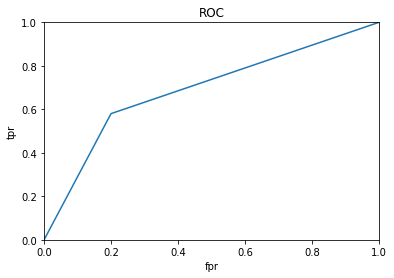

In [24]:
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC")

In [25]:
model.predict_proba(x_test)

array([[9.18548403e-01, 8.14515969e-02],
       [9.67898987e-01, 3.21010132e-02],
       [1.28814154e-01, 8.71185846e-01],
       [8.72320965e-01, 1.27679035e-01],
       [4.68302645e-01, 5.31697355e-01],
       [2.50667487e-01, 7.49332513e-01],
       [7.08032805e-04, 9.99291967e-01],
       [9.52770117e-01, 4.72298829e-02],
       [1.18401915e-02, 9.88159809e-01],
       [9.23383066e-01, 7.66169336e-02],
       [9.37523427e-01, 6.24765728e-02],
       [4.44436479e-02, 9.55556352e-01],
       [1.04084321e-01, 8.95915679e-01],
       [7.98191583e-01, 2.01808417e-01],
       [3.94036088e-01, 6.05963912e-01],
       [3.90482890e-01, 6.09517110e-01],
       [9.84546387e-01, 1.54536125e-02],
       [8.78620375e-01, 1.21379625e-01],
       [7.30660188e-01, 2.69339812e-01],
       [7.96729273e-01, 2.03270727e-01],
       [5.77369952e-01, 4.22630048e-01],
       [9.96642474e-01, 3.35752625e-03],
       [1.27850040e-01, 8.72149960e-01],
       [4.32555896e-03, 9.95674441e-01],
       [9.356976